# Superimpose Structures via Python by python script

This notebook was prompted by a response to [this biostars question](https://www.biostars.org/p/9528492/#9528492).  
It assumes you worked through the code on the 'Index' notebook and then the first available notebook in this series already.

Note, that the Biostar's question specifically asked to use PyMOL's `super` command. I generally use `pair_fit` in PyMOL when I need precise per residue matching, and as discussed [here](https://nbviewer.org/github/fomightez/cl_demo-binder/blob/master/notebooks/Determine%20residues%20that%20match%20to%20a%20reference%20from%20MSA%20and%20use%20to%20construct%20fit%20commands.ipynb) prefer these days to let [TM-align](https://zhanggroup.org/TM-align/) do 'overall' structure-to-structure structural alignments.



----

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterix will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>


---


## Preparation

The intial parts to set up to send commands to PyMol are the same and so we'll define those as block of code we can prepend in front of special things to do.

In [1]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
'''

With a block of code defined that we can use within this running notebook, we can now step through each of the basic steps to get a structure and make an image using it with PyMol.

(Note that to better match the posted questions this was in response to, the `cmd = pymol.cmd` shortening trick wasn't used here in this notebook, unlike others.) 

## Retrieving a structure

Let's define a command to get a structuure. As pdb format. Because I found `cif` format didn't work well with multiple `load` commands.

In [2]:
cmd2run = "cmd.fetch('1rpu', type='pdb')"

Let's use the `init_block` now to combine it with the command to run and make a script to get a structure file.

In [3]:
script_txt = init_block + cmd2run
%store script_txt >script_f.py

Writing 'script_txt' (str) to file 'script_f.py'.


Let's run that script and get the structure.

In [4]:
!pymol -cq script_f.py

Let's see if that got the structure by running the next cell which shows the contents of that directory.

In [5]:
ls

1f9j.pdb                demo_palette.ipynb
1rpu.pdb                demo_residue_secondary_structure.ipynb
1yx5.pdb                demo_superimpose.ipynb
demo4super.png          illustrate_std_demo.ipynb
demo_apply_combo.ipynb  script_f.py
demo_colors.ipynb       script_o.py
demo_orient.ipynb


Note that `1rpu.pdb` is now among the list of files in the working directory.

## Superposition followed by making an image after superposition

First, with an example adapted from [the PyMOL wiki documentation of the super command](https://pymolwiki.org/index.php/Super):

In [6]:
cmds2run = '''pymol.cmd.fetch('1f9j', type='pdb')
pymol.cmd.fetch('1yx5', type='pdb')
pymol.cmd.extract("1f9j_A", "1f9j and chain A")
pymol.cmd.extract("1yx5_B", "1yx5 and chain B")
pymol.cmd.super('1f9j_A', '1yx5_B')
pymol.cmd.color ("grey90", "chain A")
pymol.cmd.color ("skyblue", "1f9j_A")
pymol.cmd.color ("lightmagenta", "chain B")
pymol.cmd.color ("tv_orange", "chain B")
pymol.cmd.set ("ray_opaque_background", 0)
pymol.cmd.bg_color ("white")
pymol.cmd.set ("cartoon_fancy_helices", 1)
pymol.cmd.set ("cartoon_side_chain_helper", "on")
pymol.cmd.hide ("everything", "all")
pymol.cmd.show ("cartoon", "all")
pymol.cmd.center("1yx5_B")
pymol.cmd.zoom("1yx5_B")
pymol.cmd.set ("fog_start", 0.90)
pymol.cmd.png('demo4super.png', 800, 800, dpi=300, ray=1)
'''

In [7]:
script_txt = init_block + cmds2run
%store script_txt >script_o.py
!pymol -cq script_o.py

Writing 'script_txt' (str) to file 'script_o.py'.


In [8]:
ls

1f9j.pdb                demo_palette.ipynb
1rpu.pdb                demo_residue_secondary_structure.ipynb
1yx5.pdb                demo_superimpose.ipynb
demo4super.png          illustrate_std_demo.ipynb
demo_apply_combo.ipynb  script_f.py
demo_colors.ipynb       script_o.py
demo_orient.ipynb


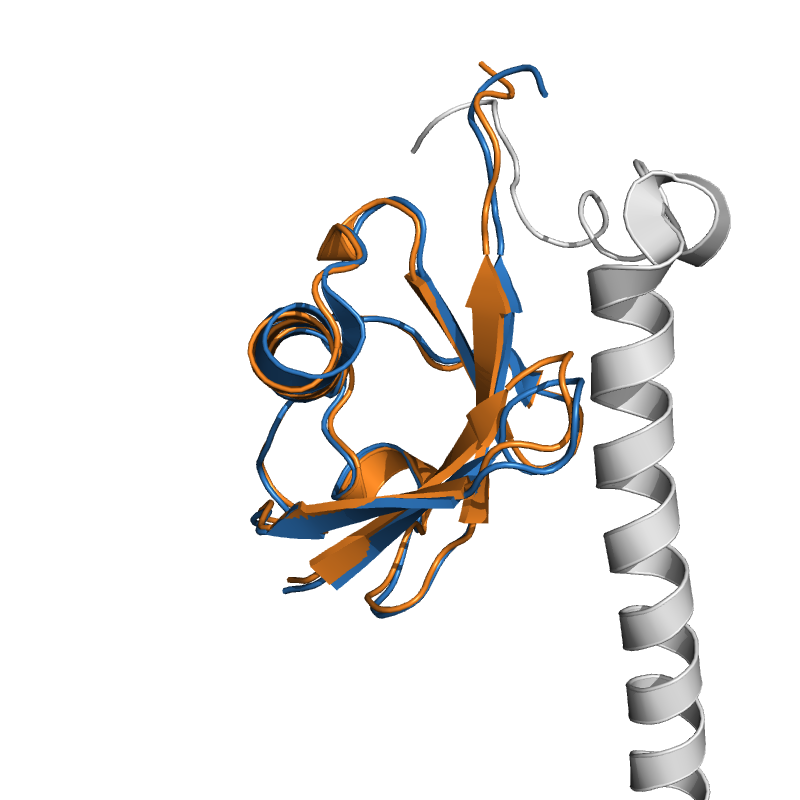

In [9]:
from IPython.display import Image
Image("demo4super.png")

To illustrate very clearly the effect of the superposition command, go back up to the block of 'cmds2run' code just above and place a `#` symbol in front of the line of code that reads `pymol.cmd.super('1f9j_A', '1yx5_B')` to comment out that line. Then re-reun that cell and the rest just above this comment.

## Superposition with structures in biostars question

In [10]:
cmds2run = '''pymol.cmd.fetch('6ufo', type='pdb')
pymol.cmd.fetch('4xmb', type='pdb')
pymol.cmd.load('6ufo.pdb')
pymol.cmd.load('4xmb.pdb')
pymol.cmd.super('6ufo', '4xmb')
pymol.cmd.set ("ray_opaque_background", 0)
pymol.cmd.bg_color ("white")
pymol.cmd.set ("cartoon_fancy_helices", 1)
pymol.cmd.set ("cartoon_side_chain_helper", "on")
pymol.cmd.hide ("everything", "all")
pymol.cmd.show ("cartoon", "all")
pymol.cmd.center("chain A")
pymol.cmd.zoom("chain A")
pymol.cmd.set ("fog_start", 0.80)
pymol.cmd.rotate([1,1,1], -90, "chain A")
pymol.cmd.png('super.png', 640, 640, dpi=300, ray=1)
'''

In [11]:
script_txt = init_block + cmds2run
%store script_txt >script_o.py
!pymol -cq script_o.py

Writing 'script_txt' (str) to file 'script_o.py'.


In [12]:
ls

1f9j.pdb                demo_orient.ipynb
1rpu.pdb                demo_palette.ipynb
1yx5.pdb                demo_residue_secondary_structure.ipynb
4xmb.pdb                demo_superimpose.ipynb
6ufo.pdb                illustrate_std_demo.ipynb
demo4super.png          script_f.py
demo_apply_combo.ipynb  script_o.py
demo_colors.ipynb       super.png
